In [1]:
#import needed packages
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from datetime import datetime as dt

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)  

import sklearn
from sklearn.feature_selection import VarianceThreshold
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import cluster
from sklearn.cluster import KMeans, MiniBatchKMeans
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from matplotlib import cm

# Libraries needed for hierarchical clustering.
from scipy import cluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn import cluster
from sklearn.cluster import KMeans, MiniBatchKMeans
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from matplotlib import cm

#set directory
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir= str(main_dir)+'\Data'
print(data_dir)
os.chdir(data_dir)

C:\Users\625737\Desktop\TEDS
C:\Users\625737\Desktop\TEDS\Data


In [2]:
lego_subset= pd.read_csv('LEGO_subset.csv')
print(lego_subset.shape)
lego_subset.head()
lego_subset= lego_subset.drop(columns='Unnamed: 0')
lego_subset.head()

(10165, 9)


,list_price,piece_count,num_reviews,prod_id,review_difficulty,star_rating,val_star_rating,country_num
0,29.99,277.0,2.0,75823.0,3,4.5,4.0,1
1,19.99,168.0,2.0,75822.0,2,5.0,4.0,1
2,12.99,74.0,11.0,75821.0,2,4.3,4.1,1
3,99.99,1032.0,23.0,21030.0,3,4.6,4.3,1
4,79.99,744.0,14.0,21035.0,4,4.6,4.1,1


In [3]:
lego_subset.describe()

,list_price,piece_count,num_reviews,prod_id,review_difficulty,star_rating,val_star_rating,country_num
count,10165.000000,10165.000000,10165.000000,1.016500e+04,10165.000000,10165.000000,10165.000000,10165.000000
mean,71.430894,561.123955,17.552681,6.566977e+04,2.468864,4.504466,4.224476,10.584850
std,99.054339,885.118073,37.051847,1.786364e+05,0.828304,0.521850,0.661356,6.150305
min,2.272400,1.000000,1.000000,6.300000e+02,1.000000,1.800000,1.000000,1.000000
25%,20.986000,116.000000,3.000000,3.106800e+04,2.000000,4.300000,4.000000,5.000000
50%,37.807800,257.000000,6.000000,6.011900e+04,2.000000,4.600000,4.300000,10.000000
75%,79.990000,603.000000,14.000000,7.124500e+04,3.000000,4.900000,4.700000,16.000000
max,1104.870000,7541.000000,367.000000,2.000431e+06,5.000000,5.000000,5.000000,21.000000


# Log-Log Regression

In [4]:
lego_subset['star_rating_log']= np.log(lego_subset.iloc[:, 4])
lego_subset['list_price_log']= np.log(lego_subset['list_price'])
lego_subset.head()

lego_subset= sm.add_constant(lego_subset)
model_log= sm.OLS(lego_subset['star_rating_log'], lego_subset.loc[:, ['const', 'list_price_log']]).fit()

prediction_log = model_log.predict(lego_subset.loc[:,['const','list_price_log']])
prediction_log[1:10]

prediction = np.exp(prediction_log)
prediction[1:5]

1    1.925925
2    1.732899
3    2.857158
4    2.705129
dtype: float64

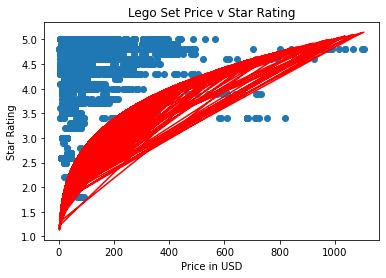

In [5]:
plt.scatter(lego_subset['list_price'],lego_subset['star_rating'])
plt.plot(lego_subset['list_price'], prediction, 'red')
plt.title("Lego Set Price v Star Rating")
plt.xlabel("Price in USD")
plt.ylabel("Star Rating")
plt.show()

In [6]:
actual = lego_subset['star_rating']
prediction = prediction
residuals = actual - prediction
loglog_results =  pd.concat([actual.rename('actual'),
                              prediction.rename('predicted'),
                              residuals.rename('residuals')], axis = 1)
def rmse(predictions,actual):
    return np.sqrt(((predictions-actual) ** 2).mean())
    
print(rmse(loglog_results['predicted'],loglog_results['actual']))

2.268074937786409


#  Log-lin

1     4.819236
2     3.104190
3    24.419760
4    19.519629
5    14.619498
6    14.619498
7    12.169433
8     9.719367
9     9.719367
dtype: float64
1    1.238704e+02
2    2.229116e+01
3    4.030575e+10
4    3.001008e+08
dtype: float64


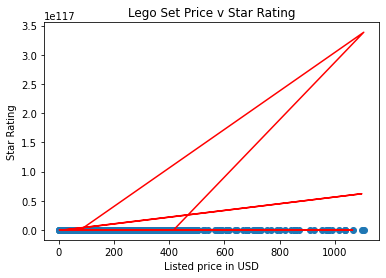

3.4136377820330963e+115


In [7]:
lego_subset['star_rating_log']= np.log(lego_subset.iloc[:, 4])

lego_subset = sm.add_constant(lego_subset)
model_lin = sm.OLS(lego_subset['star_rating_log'], lego_subset.loc[:,['const','list_price']]).fit()

prediction_lin = model_log.predict(lego_subset.loc[:,['const','list_price']])
print(prediction_lin[1:10])

prediction = np.exp(prediction_lin)
print(prediction[1:5])


plt.scatter(lego_subset['list_price'],lego_subset['star_rating'])
plt.plot(lego_subset['list_price'], prediction, 'red')
plt.title("Lego Set Price v Star Rating")
plt.xlabel("Listed price in USD")
plt.ylabel("Star Rating")
plt.show()

actual = lego_subset['star_rating']
prediction = prediction
residuals = actual - prediction
loglog_results =  pd.concat([actual.rename('actual'),
                              prediction.rename('predicted'),
                              residuals.rename('residuals')], axis = 1)
    
print(rmse(loglog_results['predicted'],loglog_results['actual']))

# Polynomial Regression

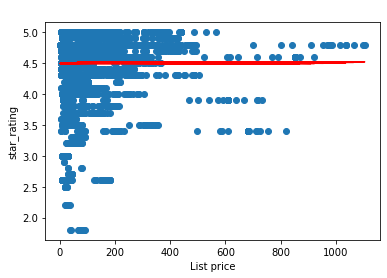

0.5217791739203651


In [8]:
lego_subset['list_price2'] = np.power(lego_subset['list_price'], 2)
lego_subset['list_price3'] = np.power(lego_subset['list_price'], 3)
lego_subset.head(3)

lego_subset = sm.add_constant(lego_subset)
model_poly = sm.OLS(lego_subset['star_rating'], lego_subset.loc[:,['const','list_price','list_price2','list_price3']]).fit()

prediction_poly = model_poly.predict(lego_subset.loc[:,['const','list_price','list_price2','list_price3']])
prediction_poly[1:10]

plt.scatter(lego_subset['list_price'],lego_subset['star_rating'])
plt.plot(lego_subset['list_price'], prediction_poly, 'red')
plt.title(' ')
plt.xlabel("List price")
plt.ylabel("star_rating")
plt.show()

actual = lego_subset['star_rating']
prediction = prediction_poly
residuals = actual - prediction
poly_results =  pd.concat([actual.rename('actual'),
                              prediction.rename('predicted'),
                              residuals.rename('residuals')], axis = 1)

print(rmse(poly_results['predicted'],poly_results['actual']))